In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
# Load the dataset
dataset=pd.read_csv('Dataset .csv')

In [40]:
dataset.shape

(4411, 21)

In [41]:
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


#### Task 1

##### Analyze the text reviews to identify the most common positive and negative keywords.

In [22]:
from wordcloud import WordCloud

In [23]:
dataset['Rating text'].value_counts()

Rating text
Average      1574
Good         1152
Not rated     706
Very Good     700
Excellent     205
Poor           73
Name: count, dtype: int64

In [24]:
positive_reviews = dataset[dataset['Rating text'].isin(['Excellent', 'Very Good', 'Good'])]['Rating text']
positive_reviews.value_counts()

Rating text
Good         1152
Very Good     700
Excellent     205
Name: count, dtype: int64

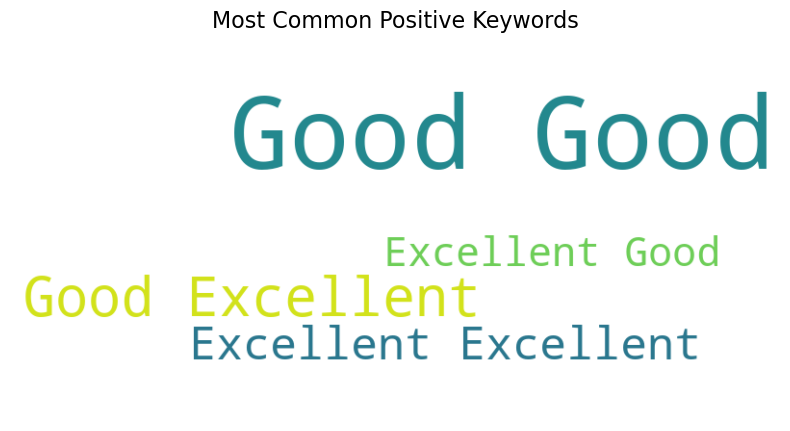

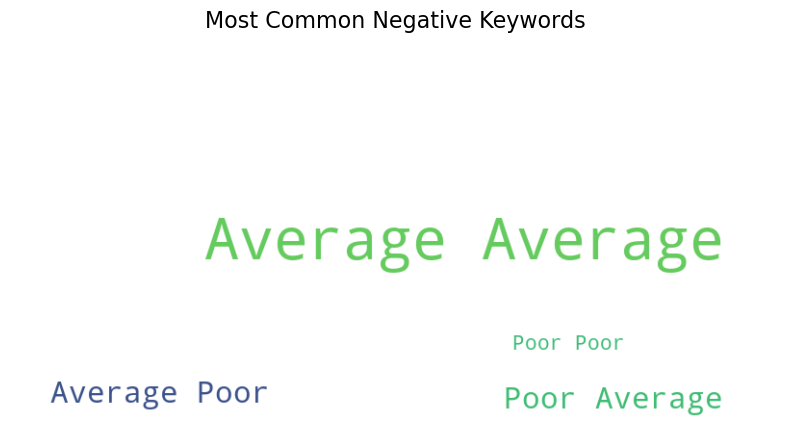

In [27]:
negative_reviews = dataset[dataset['Rating text'].isin(['Average', 'Poor', 'Very Poor'])]['Rating text']
negative_reviews.value_counts()

# display the moost common words
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


plot_wordcloud(' '.join(positive_reviews), 'Most Common Positive Keywords')
plot_wordcloud(' '.join(negative_reviews), 'Most Common Negative Keywords')

#### Task-2

 ##### Identify the restaurants with the highest and lowest number of votes.

In [44]:
# Step 1: Identify the restaurant with the highest number of votes
highest_votes_restaurant = dataset.loc[dataset['Votes'].idxmax()]

# Step 2: Identify the restaurant with the lowest number of votes
lowest_votes_restaurant = dataset.loc[dataset['Votes'].idxmin()]

# Display the results
print("Restaurant with the highest number of votes:")
print(highest_votes_restaurant)

print("\nRestaurant with the lowest number of votes:")
print(lowest_votes_restaurant)

Restaurant with the highest number of votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                               2000.0
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

##### Analyze if there is a correlation between the  number of 'votes' and the 'rating' of a restaurant.


Correlation between Votes and Rating: 0.31


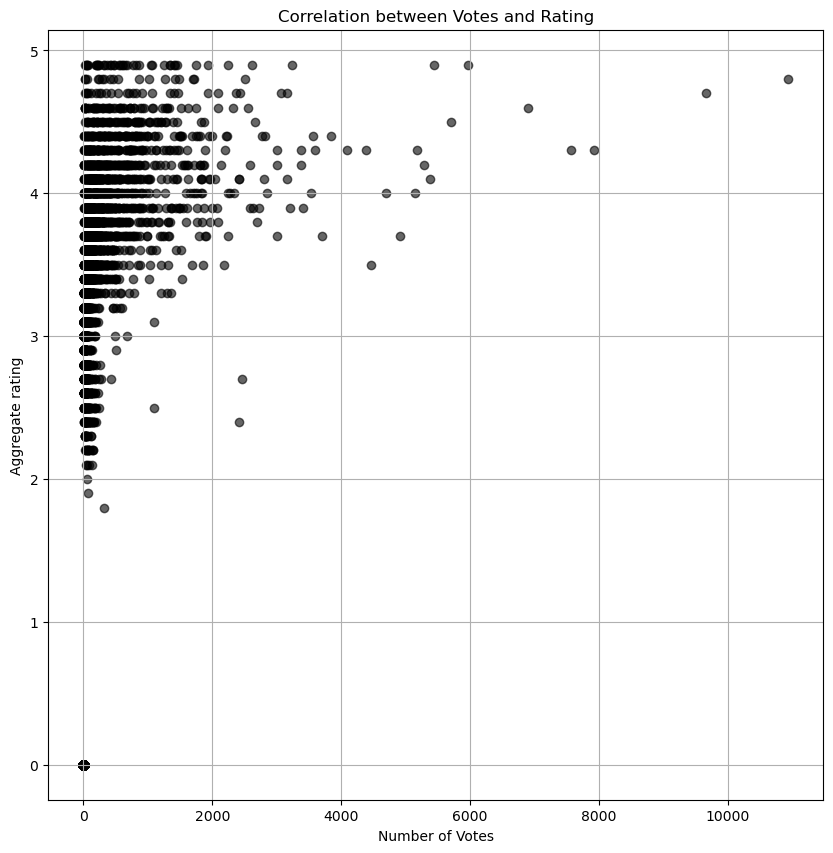

In [43]:
#  Identify the restaurant with the highest number of votes
# then  Calculate the correlation coefficient between Votes and Rating
correlation = dataset['Votes'].corr(dataset['Aggregate rating'])

# Display the correlation coefficient
print(f"Correlation between Votes and Rating: {correlation:.2f}")

# Step 2: Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(dataset['Votes'], dataset['Aggregate rating'], color='Black', alpha=0.6)
plt.title('Correlation between Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate rating')
plt.grid(True)
plt.show()

#### Task-3

##### Price Range vs. Online Delivery and Table Booking

In [11]:
# Extract the relevant columns
subset_data = dataset[['Price range', 'Has Online delivery', 'Has Table booking']]

# Create a cross-tabulation
cross_tab = pd.crosstab(subset_data['Price range'], [subset_data['Has Online delivery'], subset_data['Has Table booking']]).reset_index()

# Calculate percentages of online delivery and table booking by price range
percentage_table = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Display results
print("Cross-Tabulation: Price Range vs. Online Delivery and Table Booking")
print(cross_tab)
print("\nPercentages of Online Delivery and Table Booking by Price Range:")
print(percentage_table)
     

Cross-Tabulation: Price Range vs. Online Delivery and Table Booking
Has Online delivery Price range    No       Yes     
Has Table booking                  No  Yes   No  Yes
0                           1.0  1420    0  299    1
1                           2.0   883   47  521   57
2                           3.0   392  229   89  160
3                           4.0   171  105   10   26

Percentages of Online Delivery and Table Booking by Price Range:
Has Online delivery Price range         No                   Yes           
Has Table booking                       No        Yes         No        Yes
0                      0.058106  82.510169   0.000000  17.373620   0.058106
1                      0.132450  58.476821   3.112583  34.503311   3.774834
2                      0.343643  44.902635  26.231386  10.194731  18.327606
3                      1.265823  54.113924  33.227848   3.164557   8.227848
